# What is Spark, anyway?

Spark is a platform for cluster computing. Spark lets you spread data and computations over clusters with multiple nodes (think of each node as a separate computer). Splitting up your data makes it easier to work with very large datasets because each node only works with a small amount of data.

As each node works on its own subset of the total data, it also carries out a part of the total calculations required, so that both data processing and computation are performed in parallel over the nodes in the cluster. It is a fact that parallel computation can make certain types of programming tasks much faster.

However, with greater computing power comes greater complexity.

Deciding whether or not Spark is the best solution for your problem takes some experience, but you can consider questions like:

- Is my data too big to work with on a single machine?
- Can my calculations be easily parallelized?

# Using Spark in Python

The first step in using Spark is connecting to a cluster.

In practice, the cluster will be hosted on a remote machine that's connected to all other nodes. There will be one computer, called the master that manages splitting up the data and the computations. The master is connected to the rest of the computers in the cluster, which are called worker. The master sends the workers data and calculations to run, and they send their results back to the maste

Creating the connection is as simple as creating an instance of the `SparkContext` class. The class constructor takes a few optional arguments that allow you to specify the attributes of the cluster you're connecting to.

In [2]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=b08220c09bcea99e9e3993f3824ac2526824f083bb22faae9b69f65964f13b56
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [4]:
from pyspark import SparkContext as sc

# Verify SparkContext
print(sc)

# Print Spark version
print(sc.version)

<class 'pyspark.context.SparkContext'>


# Using DataFrames

To start working with Spark DataFrames, you first have to create a `SparkSession` object from your `SparkContext`. You can think of the `SparkContext` as your connection to the cluster and the `SparkSession` as your interface with that connection.

**Note:** Creating multiple SparkSessions and SparkContexts can cause issues, so it's best practice to use the SparkSession.builder.getOrCreate() method.

In [6]:
# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession

# Make a new SparkSession called my_spark using SparkSession.builder.appName() method
my_spark = SparkSession.builder.getOrCreate()

# Print my_spark
print(my_spark)

In [9]:
# Create Spark DataFrame
flights_df = my_spark.read.csv("/content/flights_small.csv", header=True, inferSchema=True)

# Show the DataFrame
flights_df.show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|
|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA| BUR|     127|     937|   7|    54|
|2014|    1| 15|    1037|        7|    1

In [16]:
# Register the DataFrame as a temporary table
flights_df.createOrReplaceTempView("flights")

In [17]:
# Print the tables in the catalog using listTables()
print(my_spark.catalog.listTables())

[Table(name='flights', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]


In [18]:
# Query to get first 10 rows
query = "FROM flights SELECT * LIMIT 10"

# Get the first 10 rows of flights
flights10 = my_spark.sql(query)

# Show the results
flights10.show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|
|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA| BUR|     127|     937|   7|    54|
|2014|    1| 15|    1037|        7|    1

In [19]:
# Query counts the number of flights to each airport from SEA and PDX
query = "SELECT origin, dest, COUNT(*) as N FROM flights GROUP BY origin, dest"

# Run the query
flight_counts = my_spark.sql(query)

# Convert the results to a pandas DataFrame
pd_counts = flight_counts.toPandas()

# Print the head of pd_counts
print(pd_counts.head())

  origin dest    N
0    SEA  RNO    8
1    SEA  DTW   98
2    SEA  CLE    2
3    SEA  LAX  450
4    PDX  SEA  144


The `.createDataFrame()` method takes a pandas DataFrame and returns a Spark DataFrame.

The output of this method is stored locally, not in the `SparkSession` catalog. This means that you can use all the Spark DataFrame methods on it, but you can't access the data in other contexts.

For example, a SQL query (using the .sql() method) that references your DataFrame will throw an error. To access the data in this way, you have to save it as a temporary table.

You can do this using the `.createTempView()` Spark DataFrame method, which takes as its only argument the name of the temporary table you'd like to register. This method registers the DataFrame as a table in the catalog, but as this table is temporary, it can only be accessed from the specific `SparkSession` used to create the Spark DataFrame.

There is also the method `.createOrReplaceTempView()`. This safely creates a new temporary table if nothing was there before, or updates an existing table if one was already defined. You'll use this method to avoid running into problems with duplicate tables.

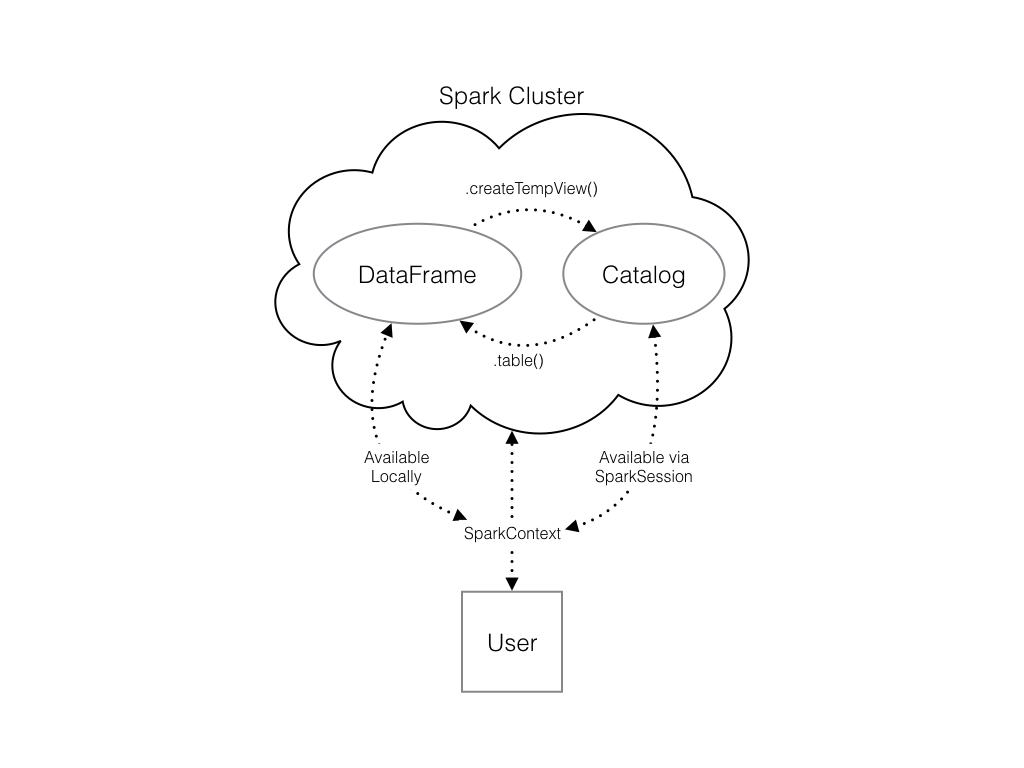

In [20]:
import pandas as pd
import numpy as np

# Create pd_temp
pd_temp = pd.DataFrame(np.random.random(10))

# Create spark_temp from pd_temp
spark_temp = my_spark.createDataFrame(pd_temp)

# Examine the tables in the catalog
print(my_spark.catalog.listTables())

# Add spark_temp to the catalog
spark_temp.createOrReplaceTempView("temp")

# Examine the tables in the catalog again
print(my_spark.catalog.listTables())

[Table(name='flights', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]
[Table(name='flights', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True), Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]


In [21]:
# Read in the airports data
airports = my_spark.read.csv('/content/airports.csv', header=True)

# Show the data
airports.show()

+---+--------------------+----------------+-----------------+----+---+---+
|faa|                name|             lat|              lon| alt| tz|dst|
+---+--------------------+----------------+-----------------+----+---+---+
|04G|   Lansdowne Airport|      41.1304722|      -80.6195833|1044| -5|  A|
|06A|Moton Field Munic...|      32.4605722|      -85.6800278| 264| -5|  A|
|06C| Schaumburg Regional|      41.9893408|      -88.1012428| 801| -6|  A|
|06N|     Randall Airport|       41.431912|      -74.3915611| 523| -5|  A|
|09J|Jekyll Island Air...|      31.0744722|      -81.4277778|  11| -4|  A|
|0A9|Elizabethton Muni...|      36.3712222|      -82.1734167|1593| -4|  A|
|0G6|Williams County A...|      41.4673056|      -84.5067778| 730| -5|  A|
|0G7|Finger Lakes Regi...|      42.8835647|      -76.7812318| 492| -5|  A|
|0P2|Shoestring Aviati...|      39.7948244|      -76.6471914|1000| -5|  U|
|0S9|Jefferson County ...|      48.0538086|     -122.8106436| 108| -8|  A|
|0W3|Harford County Ai...

# Manipulating Data

## Creating Columns
In Spark you can do this using the `.withColumn()` method, which takes two arguments. First, a string with the name of your new column, and second the new column itself.

The new column must be an object of class `Column`. Creating one of these is as easy as extracting a column from your DataFrame using `df.colName`.

Updating a Spark DataFrame is somewhat different than working in `pandas` because the Spark DataFrame is *immutable*. This means that it can't be changed, and so columns can't be updated in place.

Thus, all these methods return a new DataFrame. To overwrite the original DataFrame you must reassign the returned DataFrame using the method like so:

`df = df.withColumn("newCol", df.oldCol + 1)`

The above code creates a DataFrame with the same columns as `df` plus a new column, `newCol`, where every entry is equal to the corresponding entry from `oldCol`, plus one.

To overwrite an existing column, just pass the name of the column as the first argument!

In [22]:
# Use the spark.table() method with the argument "flights" to create a DataFrame containing the values of the flights table in the .catalog
flights = my_spark.table('flights')

# Show the head
flights.show()

# Add duration_hrs
flights = flights.withColumn('duration_hrs', flights.air_time/ 60)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|
|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA| BUR|     127|     937|   7|    54|
|2014|    1| 15|    1037|        7|    1

In [24]:
# Updated flights with new column
flights.show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+------------------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|      duration_hrs|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+------------------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|               2.2|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|               6.0|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|              1.85|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|1.3833333333333333|
|2014|    3|  9|     754|  

## Filtering Data 

The `.filter()` method takes either an expression that would follow the `WHERE` clause of a SQL expression as a string, or a Spark Column of boolean (True/False) values.

For example, the following two expressions will produce the same output:

```
flights.filter("air_time > 120").show()
flights.filter(flights.air_time > 120).show()
```

In [25]:
# Filter flights by passing a string
long_flights1 = flights.filter("distance > 1000")

# Filter flights by passing a column of boolean values
long_flights2 = flights.filter(flights.distance > 1000)

# Print the data to check they're equal
long_flights1.show()
long_flights2.show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+------------------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|      duration_hrs|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+------------------+
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|               6.0|
|2014|    4| 19|    1236|       -4|    1508|       -7|     AS| N309AS|   490|   SEA| SAN|     135|    1050|  12|    36|              2.25|
|2014|   11| 19|    1812|       -3|    2352|       -4|     AS| N564AS|    26|   SEA| ORD|     198|    1721|  18|    12|               3.3|
|2014|    8|  3|    1120|        0|    1415|        2|     AS| N305AS|   656|   SEA| PHX|     154|    1107|  11|    20| 2.566666666666667|
|2014|   11| 12|    2346|  

## Selecting

The Spark variant of SQL's `SELECT` is the `.select()` method. This method takes multiple arguments - one for each column you want to select. These arguments can either be the column name as a string (one for each column) or a column object (using the `df.colName` syntax). When you pass a column object, you can perform operations like addition or subtraction on the column to change the data contained in it, much like inside `.withColumn()`.

In [28]:
# Select the first set of columns
selected1 = flights.select("tailnum", "origin", "dest")

# Select the second set of columns
temp = flights.select(flights.origin, flights.dest, flights.carrier)

# Define first filter
filterA = flights.origin == "SEA"

# Define second filter
filterB = flights.dest == "PDX"

# Filter the data, first by filterA then by filterB
selected2 = temp.filter(filterA).filter(filterB)

In [30]:
selected1.show()

+-------+------+----+
|tailnum|origin|dest|
+-------+------+----+
| N846VA|   SEA| LAX|
| N559AS|   SEA| HNL|
| N847VA|   SEA| SFO|
| N360SW|   PDX| SJC|
| N612AS|   SEA| BUR|
| N646SW|   PDX| DEN|
| N422WN|   PDX| OAK|
| N361VA|   SEA| SFO|
| N309AS|   SEA| SAN|
| N564AS|   SEA| ORD|
| N323AS|   SEA| LAX|
| N305AS|   SEA| PHX|
| N433AS|   SEA| LAS|
| N765AS|   SEA| ANC|
| N713AS|   SEA| SFO|
| N27205|   PDX| SFO|
| N626AS|   SEA| SMF|
| N8634A|   SEA| MDW|
| N597AS|   SEA| BOS|
| N215AG|   PDX| BUR|
+-------+------+----+
only showing top 20 rows



In [31]:
temp.show()

+------+----+-------+
|origin|dest|carrier|
+------+----+-------+
|   SEA| LAX|     VX|
|   SEA| HNL|     AS|
|   SEA| SFO|     VX|
|   PDX| SJC|     WN|
|   SEA| BUR|     AS|
|   PDX| DEN|     WN|
|   PDX| OAK|     WN|
|   SEA| SFO|     VX|
|   SEA| SAN|     AS|
|   SEA| ORD|     AS|
|   SEA| LAX|     AS|
|   SEA| PHX|     AS|
|   SEA| LAS|     AS|
|   SEA| ANC|     AS|
|   SEA| SFO|     AS|
|   PDX| SFO|     UA|
|   SEA| SMF|     AS|
|   SEA| MDW|     WN|
|   SEA| BOS|     AS|
|   PDX| BUR|     OO|
+------+----+-------+
only showing top 20 rows



In [32]:
selected2.show()

+------+----+-------+
|origin|dest|carrier|
+------+----+-------+
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     AS|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     AS|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
+------+----+-------+
only showing top 20 rows



For example,
```
flights.select(flights.air_time/60)
```
returns a column of flight durations in hours instead of minutes. You can also use the `.alias()` method to rename a column you're selecting. So if you wanted to `.select()` the column duration_hrs (which isn't in your DataFrame) you could do
```
flights.select((flights.air_time/60).alias("duration_hrs"))
```
The equivalent Spark DataFrame method .selectExpr() takes SQL expressions as a string:
```
flights.selectExpr("air_time/60 as duration_hrs")
```
with the SQL as keyword being equivalent to the `.alias()` method. 

In [33]:
# Define avg_speed
avg_speed = (flights.distance/(flights.air_time/60)).alias("avg_speed")

# Select the correct columns
speed1 = flights.select("origin", "dest", "tailnum", avg_speed)

# Create the same table using a SQL expression
speed2 = flights.selectExpr("origin", "dest", "tailnum", "distance/(air_time/60) as avg_speed")

In [34]:
speed1.show()

+------+----+-------+------------------+
|origin|dest|tailnum|         avg_speed|
+------+----+-------+------------------+
|   SEA| LAX| N846VA| 433.6363636363636|
|   SEA| HNL| N559AS| 446.1666666666667|
|   SEA| SFO| N847VA|367.02702702702703|
|   PDX| SJC| N360SW| 411.3253012048193|
|   SEA| BUR| N612AS| 442.6771653543307|
|   PDX| DEN| N646SW|491.40495867768595|
|   PDX| OAK| N422WN|             362.0|
|   SEA| SFO| N361VA| 415.7142857142857|
|   SEA| SAN| N309AS| 466.6666666666667|
|   SEA| ORD| N564AS| 521.5151515151515|
|   SEA| LAX| N323AS| 440.3076923076923|
|   SEA| PHX| N305AS|431.29870129870125|
|   SEA| LAS| N433AS| 409.6062992125984|
|   SEA| ANC| N765AS|474.75409836065575|
|   SEA| SFO| N713AS| 315.8139534883721|
|   PDX| SFO| N27205| 366.6666666666667|
|   SEA| SMF| N626AS|477.63157894736844|
|   SEA| MDW| N8634A|481.38888888888886|
|   SEA| BOS| N597AS| 516.4137931034483|
|   PDX| BUR| N215AG| 441.6216216216216|
+------+----+-------+------------------+
only showing top

In [35]:
speed2.show()

+------+----+-------+------------------+
|origin|dest|tailnum|         avg_speed|
+------+----+-------+------------------+
|   SEA| LAX| N846VA| 433.6363636363636|
|   SEA| HNL| N559AS| 446.1666666666667|
|   SEA| SFO| N847VA|367.02702702702703|
|   PDX| SJC| N360SW| 411.3253012048193|
|   SEA| BUR| N612AS| 442.6771653543307|
|   PDX| DEN| N646SW|491.40495867768595|
|   PDX| OAK| N422WN|             362.0|
|   SEA| SFO| N361VA| 415.7142857142857|
|   SEA| SAN| N309AS| 466.6666666666667|
|   SEA| ORD| N564AS| 521.5151515151515|
|   SEA| LAX| N323AS| 440.3076923076923|
|   SEA| PHX| N305AS|431.29870129870125|
|   SEA| LAS| N433AS| 409.6062992125984|
|   SEA| ANC| N765AS|474.75409836065575|
|   SEA| SFO| N713AS| 315.8139534883721|
|   PDX| SFO| N27205| 366.6666666666667|
|   SEA| SMF| N626AS|477.63157894736844|
|   SEA| MDW| N8634A|481.38888888888886|
|   SEA| BOS| N597AS| 516.4137931034483|
|   PDX| BUR| N215AG| 441.6216216216216|
+------+----+-------+------------------+
only showing top

## Aggregating

All of the common aggregation methods, like `.min()`, `.max()`, and `.count()` are GroupedData methods. These are created by calling the `.groupBy()` DataFrame method. 

For example, to find the minimum value of a column, col, in a DataFrame, df, you could do
```
df.groupBy().min("col").show()
```
This creates a GroupedData object (so you can use the `.min()` method), then finds the minimum value in `col`, and returns it as a DataFrame.

In [41]:
# Find the shortest flight from PDX in terms of distance
flights.filter(flights.origin == 'PDX').groupBy().min('distance').show()

# Find the longest flight from SEA in terms of duration_hrs
flights.filter(flights.origin == 'SEA').groupBy().max('duration_hrs').show()

+-------------+
|min(distance)|
+-------------+
|          106|
+-------------+

+-----------------+
|max(duration_hrs)|
+-----------------+
|6.816666666666666|
+-----------------+



In [42]:
# Average duration of Delta flights
flights.filter(flights.carrier == "DL").filter(flights.origin == "SEA").groupBy().avg("duration_hrs").show()

# Total hours in the air
flights.withColumn("duration_hrs", flights.air_time/60).groupBy().sum("duration_hrs").show()

+-----------------+
|avg(duration_hrs)|
+-----------------+
|3.136781609195401|
+-----------------+

+------------------+
| sum(duration_hrs)|
+------------------+
|25289.600000000126|
+------------------+



## Grouping and Aggregating

In [46]:
# Group by tailnum
by_plane = flights.groupBy("tailnum")

# Number of flights each plane made
by_plane.count().show()

# Group by origin
by_origin = flights.groupBy("origin")

# Average duration of flights from PDX and SEA
by_origin.avg("duration_hrs").show()

+-------+-----+
|tailnum|count|
+-------+-----+
| N442AS|   38|
| N102UW|    2|
| N36472|    4|
| N38451|    4|
| N73283|    4|
| N513UA|    2|
| N954WN|    5|
| N388DA|    3|
| N567AA|    1|
| N516UA|    2|
| N927DN|    1|
| N8322X|    1|
| N466SW|    1|
|  N6700|    1|
| N607AS|   45|
| N622SW|    4|
| N584AS|   31|
| N914WN|    4|
| N654AW|    2|
| N336NW|    1|
+-------+-----+
only showing top 20 rows

+------+------------------+
|origin| avg(duration_hrs)|
+------+------------------+
|   SEA| 2.673935826752105|
|   PDX|2.2852572080481233|
+------+------------------+



There is the `.agg()` method. This method lets you pass an aggregate column expression that uses any of the aggregate functions from the `pyspark.sql.functions` submodule.

This submodule contains many useful functions for computing things like standard deviations. All the aggregation functions in this submodule take the name of a column in a `GroupedData` table.

In [53]:
# Import pyspark.sql.functions as F
import pyspark.sql.functions as F

# Converting 'dep_delay' into numeric column
flights = flights.withColumn("dep_delay",flights.dep_delay.cast('int'))

# Group by month and dest
by_month_dest = flights.groupBy('month','dest')

# Average departure delay by month and destination
by_month_dest.avg('dep_delay').show()

# Standard deviation of departure delay
by_month_dest.agg(F.stddev('dep_delay')).show()

+-----+----+-------------------+
|month|dest|     avg(dep_delay)|
+-----+----+-------------------+
|    4| PHX| 1.6833333333333333|
|    1| RDM|             -1.625|
|    5| ONT| 3.5555555555555554|
|    7| OMA|               -6.5|
|    8| MDW|               7.45|
|    6| DEN|  5.418181818181818|
|    5| IAD|               -4.0|
|   12| COS|               -1.0|
|   11| ANC|  7.529411764705882|
|    5| AUS|              -0.75|
|    5| COS| 11.666666666666666|
|    2| PSP|                0.6|
|    4| ORD|0.14285714285714285|
|   10| DFW| 18.176470588235293|
|   10| DCA|               -1.5|
|    8| JNU|             18.125|
|   11| KOA|               -1.0|
|   10| OMA|-0.6666666666666666|
|    6| ONT|              9.625|
|    3| MSP|                3.2|
+-----+----+-------------------+
only showing top 20 rows

+-----+----+----------------------+
|month|dest|stddev_samp(dep_delay)|
+-----+----+----------------------+
|    4| PHX|    15.003380033491737|
|    1| RDM|     8.830749846821778|
| 

## Joining

In PySpark, joins are performed using the DataFrame method `.join()`. This method takes three arguments. The first is the second DataFrame that you want to join with the first one. The second argument, `on`, is the name of the key column(s) as a string. The names of the key column(s) must be the same in each table. The third argument, `how`, specifies the kind of join to perform. 

In [55]:
# Examine the data
print(airports.show())

# Rename the faa column
airports = airports.withColumnRenamed("faa","dest")

# Join the DataFrames
flights_with_airports = flights.join(airports,on='dest',how="leftouter")

# Examine the new DataFrame
print(flights_with_airports.show())

+---+--------------------+----------------+-----------------+----+---+---+
|faa|                name|             lat|              lon| alt| tz|dst|
+---+--------------------+----------------+-----------------+----+---+---+
|04G|   Lansdowne Airport|      41.1304722|      -80.6195833|1044| -5|  A|
|06A|Moton Field Munic...|      32.4605722|      -85.6800278| 264| -5|  A|
|06C| Schaumburg Regional|      41.9893408|      -88.1012428| 801| -6|  A|
|06N|     Randall Airport|       41.431912|      -74.3915611| 523| -5|  A|
|09J|Jekyll Island Air...|      31.0744722|      -81.4277778|  11| -4|  A|
|0A9|Elizabethton Muni...|      36.3712222|      -82.1734167|1593| -4|  A|
|0G6|Williams County A...|      41.4673056|      -84.5067778| 730| -5|  A|
|0G7|Finger Lakes Regi...|      42.8835647|      -76.7812318| 492| -5|  A|
|0P2|Shoestring Aviati...|      39.7948244|      -76.6471914|1000| -5|  U|
|0S9|Jefferson County ...|      48.0538086|     -122.8106436| 108| -8|  A|
|0W3|Harford County Ai...

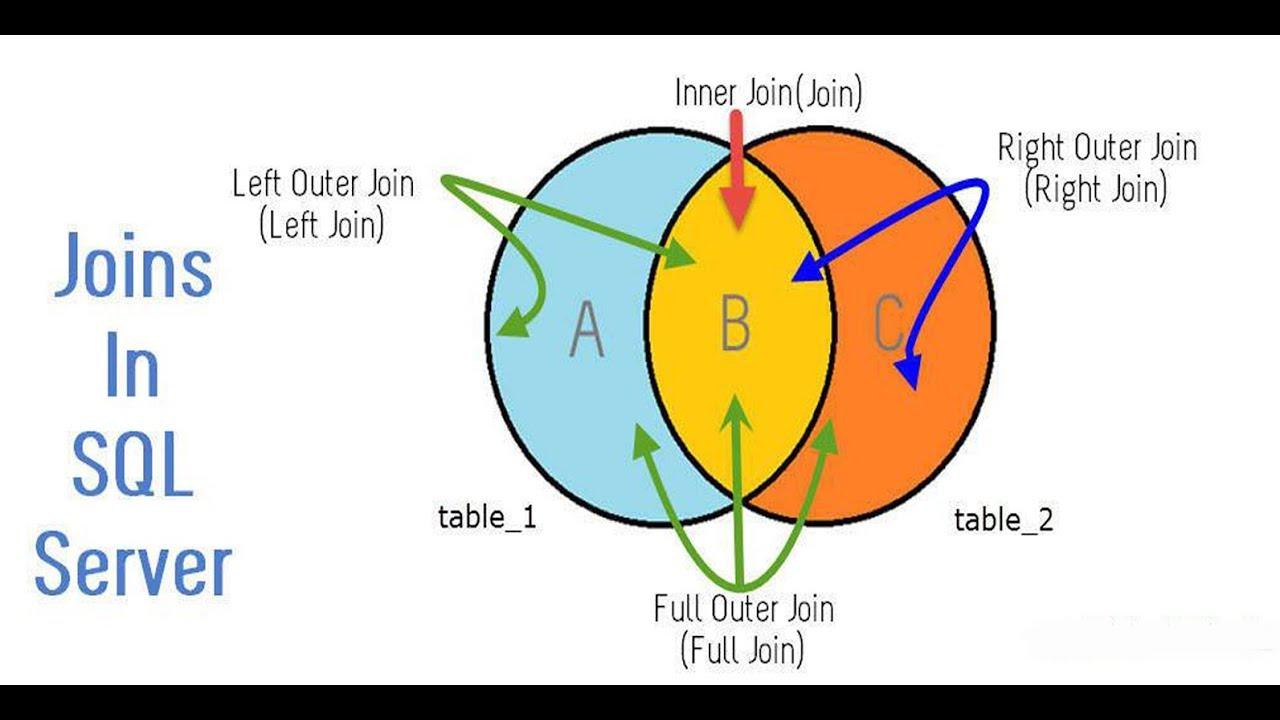